## The Dataset

The IMDb Movies Dataset comprises the top 1000 most popular and highly-rated films on the IMDb website, which serves as an extensive online database for information on movies, television series, videos, and related content.

According to the information page of the dataset, the IMDb Movies Dataset was constructed using web scraping techniques to extract information directly from the IMDB site itself. Web scraping is an automated extraction of data from relevant webpages in a short amount of time (Hillier, 2021).

Knowing this, the dataset could potentially have data inconsistencies due to variations in how information is presented on web pages. As such, data cleaning and preprocessing efforts are required for this dataset.

In the dataset, one can see that there are a total of 1000 observations (rows), across 16 variables (columns). Here are the descriptions of each variable in the dataset:

- **`Poster_Link`** - link to the image of the movie's poster on IMDb
- **`Series_Title`** - title of the movie
- **`Released_Year`** - year in which the movie was publicly released
- **`Certificate`** - rating that indicates the appropriate audience or age group for which the movie is suitable
- **`Runtime`** - total duration or length of the movie, measured in minutes
- **`Genre`** - type, category, or theme of the movie
- **`IMDB_Rating`** - numerical score based on user reviews and rating on IMDb
- **`Overview`** - brief summary or description of the movie's plot, storyline, or premise
- **`Meta_score`** - numerical score based on reputed critics on IMDb
- **`Director`** - name of the movie's director
- **`Star1`** - name of the first lead actor/actress in the movie
- **`Star2`** - name of the second lead actor/actress in the movie
- **`Star3`** - name of the third lead actor/actress in the movie
- **`Star4`** - name of the fourth lead actor/actress in the movie
- **`No_of_votes`** - total number of votes or user reviews/ratings the movie has received on IMDb
- **`Gross`** - amount of money earned or grossed by the movie


## Reading the Dataset

The function [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) will load the IMDb Movie Dataset into a pandas `DataFrame`. Now, one can perform various data manipulation and analysis tasks with the dataset. Make sure to replace `'imdb_top_1000.csv'` in the `read_csv` parameter with the actual path to the dataset file in your local storage.


In [439]:
!pip install mlxtend
!pip install matplotlib_venn

In [440]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency

In [441]:
imdb_df = pd.read_csv("imdb_top_1000.csv")

## Data Cleaning

The researchers took a better look at the dataset prior to data cleaning. It seems like there are missing values in some of the variables. There are also inconsistent data types.


### A. General Information


In [442]:
# Display general information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### B. Dropping of Variables


In [443]:
# Drop variables not utilized in the study
imdb_df = imdb_df.drop(columns=['Poster_Link', 'Overview'])
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


### C. Missing Data


In [444]:
# Check for missing data
imdb_df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

There are missing values in the following variables. Since they are important to the analysis, imputation will be done.

- Certificate
- Meta_score
- Gross


#### C.1 Missing Data - Certificate


In [445]:
# Find the most frequent Certificate category
imdb_df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [446]:
# Replace null values in Certificate to the most frequent category
imdb_df['Certificate'].fillna('U', inplace=True)

#### C.2 Missing Data - Meta_score


In [447]:
# Check the contents of Meta_score
display(imdb_df['Meta_score'])

0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64

In [448]:
# Replace null values in Meta_score with the mean
imdb_df['Meta_score'].fillna(round(imdb_df['Meta_score'].mean()), inplace=True)

# Convert Meta_score data to int
imdb_df['Meta_score'] = imdb_df['Meta_score'].astype('int')

#### C.3 Missing Data - Gross


In [449]:
# Check the contents of Gross
display(imdb_df['Gross'])

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object

In [450]:
# Remove commas in Gross
imdb_df['Gross'] = imdb_df['Gross'].str.replace(',', '')

# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Gross'].str.match('^\d+$') == False]))

Number of non-numerical data:  0


In [451]:
# Convert Gross data to float (to handle NaN)
imdb_df['Gross'] = imdb_df['Gross'].astype(float).astype('Int64')

# Replace null values in Gross with the mean
imdb_df['Gross'].fillna(round(imdb_df['Gross'].mean()), inplace=True)

# Convert Gross data to int
imdb_df['Gross'] = imdb_df['Gross'].astype('int')

### D. Data Types


In [452]:
# Display general information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   int32  
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 101.7+ KB


Released_Year and Runtime should be represented as int


#### D.1 Data Types - Released_Year


In [453]:
# Check values in Released_Year
display(imdb_df['Released_Year'])

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: object

In [454]:
# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Released_Year'].str.match('^\d+$') == False]))

Number of non-numerical data:  1


There seems to be an error in encoding in one of the observations.


In [455]:
# Identify the non-numerical data
imdb_df[imdb_df['Released_Year'].str.match('^\d+$') == False]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


Instead of 'PG' as Apollo 13's release year, it will be replaced by its release year of 1995.


In [456]:
# Replace the value for Released_Year
imdb_df['Released_Year'] = imdb_df['Released_Year'].replace('PG', '1995')
imdb_df[imdb_df['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,77,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [457]:
# Convert Released_Year data to int
imdb_df['Released_Year'] = imdb_df['Released_Year'].astype(int)

#### D.2 Data Types - Runtime


In [458]:
# Check values in Runtime
display(imdb_df['Runtime'])

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

In [459]:
# Remove ' min' in Runtime
imdb_df['Runtime'] = imdb_df['Runtime'].str.replace(' min', '')

# Check if there are non-numerical data (because dtype is object)
print('Number of non-numerical data: ', len(imdb_df[imdb_df['Runtime'].str.match('^\d+$') == False]))

Number of non-numerical data:  0


In [460]:
# Convert Runtime data to int
imdb_df['Runtime'] = imdb_df['Runtime'].astype(int)

### E. Duplicate Data


In [461]:
# Check for duplicate data
print("Number of duplicate rows:", imdb_df.duplicated().sum())
print("Number of duplicate data for 'Series_Titles':", imdb_df.Series_Title.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate data for 'Series_Titles': 1


In [462]:
# Identify the duplicated series title
duplicated_ST = imdb_df[imdb_df.Series_Title.duplicated()]
duplicated_ST.Series_Title

136    Drishyam
Name: Series_Title, dtype: object

In [463]:
# Identify the rows with 'Drishyam' as the series title
imdb_df[(imdb_df.Series_Title == 'Drishyam')]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam,2013,U,160,"Crime, Drama, Thriller",8.3,78,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,68034751
136,Drishyam,2015,UA,163,"Crime, Drama, Mystery",8.2,78,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478


In [464]:
# Rename the two series by adding the year of release
imdb_df.at[87, 'Series_Title'] = 'Drishyam (2013)'
imdb_df.at[136, 'Series_Title'] = 'Drishyam (2015)'
imdb_df.iloc[[87, 136]]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,Drishyam (2013),2013,U,160,"Crime, Drama, Thriller",8.3,78,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,68034751
136,Drishyam (2015),2015,UA,163,"Crime, Drama, Mystery",8.2,78,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478


### F. One-hot encoding - Genre


In [465]:
# split
genre = imdb_df['Genre'].str.split(', ').tolist()
genre_joined = imdb_df['Genre'].str.split(', ')

flat_genre = [item for sublist in genre for item in sublist]

unique_genre = list(set(flat_genre))

imdb_df = imdb_df.reindex(imdb_df.columns.tolist() + unique_genre, axis=1, fill_value=0)

for index, row in imdb_df.iterrows():
    for val in row.Genre.split(', '):
        imdb_df.loc[index, val] = 1

imdb_df['Genre'] = ''
for i in range(imdb_df.shape[0]):
    imdb_df['Genre'][i] = genre_joined[i]

### G. Merging data - Stars


In [466]:
# Merge stars
imdb_df['Stars'] = ''
for i in range(imdb_df.shape[0]):
    imdb_df['Stars'][i] = [imdb_df['Star1'][i], imdb_df['Star2'][i], imdb_df['Star3'][i], imdb_df['Star4'][i]]
    
imdb_df.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis = 1, inplace = True)

### H. Finalizing the Variables


In [467]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   int32  
 7   Director       1000 non-null   object 
 8   No_of_Votes    1000 non-null   int64  
 9   Gross          1000 non-null   int32  
 10  Sport          1000 non-null   int64  
 11  Action         1000 non-null   int64  
 12  Romance        1000 non-null   int64  
 13  Sci-Fi         1000 non-null   int64  
 14  History        1000 non-null   int64  
 15  Film-Noir      1000 non-null   int64  
 16  Horror         1000 non-null   int64  
 17  Western        1000 non-null   int64  
 18  Crime    

In [468]:
reordered_cols = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Stars', 'No_of_Votes', 'Gross']
final_cols = reordered_cols + unique_genre

In [469]:
set(imdb_df.columns) == set(final_cols)

True

In [470]:
imdb_df = imdb_df[final_cols]

In [471]:
imdb_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Stars,No_of_Votes,...,Animation,War,Music,Thriller,Fantasy,Mystery,Drama,Comedy,Musical,Family
0,The Shawshank Redemption,1994,A,142,[Drama],9.3,80,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2343110,...,0,0,0,0,0,0,1,0,0,0
1,The Godfather,1972,A,175,"[Crime, Drama]",9.2,100,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1620367,...,0,0,0,0,0,0,1,0,0,0
2,The Dark Knight,2008,UA,152,"[Action, Crime, Drama]",9.0,84,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2303232,...,0,0,0,0,0,0,1,0,0,0
3,The Godfather: Part II,1974,A,202,"[Crime, Drama]",9.0,90,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...",1129952,...,0,0,0,0,0,0,1,0,0,0
4,12 Angry Men,1957,U,96,"[Crime, Drama]",9.0,96,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...",689845,...,0,0,0,0,0,0,1,0,0,0


## Exploratory Data Analysis

The primary aim of this analysis is to delve into and thoroughly examine the dataset, with the goal of acquiring valuable insights into the top 1000 movies featured on IMDb. This exploration seeks to understand the distinct features of these movies, uncover any connections between variables, and detect potential patterns or trends that may emerge.

### What is the distribution of movie ratings on IMDb?

The primary focus to answer this question is the variable:

- `IMDB_Rating`: numerical score based on user reviews and rating on IMDb.

Write code to select the `IMDB_Rating` column as a series.


In [472]:
ratings_df = imdb_df["IMDB_Rating"]
print(ratings_df)

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: IMDB_Rating, Length: 1000, dtype: float64


To numerically analyze the movie ratings, one can get the mean, median, mode, and standard deviation of the observations for ratings.


In [473]:
ratings_df.describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

It can be seen from the results that the movies in the dataset generally have high ratings with a narrow distribution. The rating range from 7.6 to 9.3 shows that while there is some variability in ratings, it is within a relatively high range, with no exceptionally low or exceptionally high outliers. The majority of these top movies have IMDb ratings falling within the interquartile range (IQR) of 7.7 to 8.1, further emphasizing their high quality.

To understand the distribution further, it is best to put the data in a histogram plot for visual representation.


Text(0, 0.5, 'Movies')

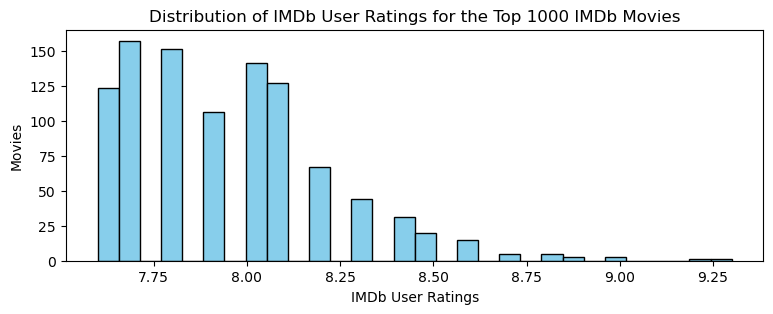

In [474]:
plt.figure(figsize=(9, 3))
plt.hist(ratings_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of IMDb User Ratings for the Top 1000 IMDb Movies")
plt.xlabel("IMDb User Ratings")
plt.ylabel("Movies")

Examining the histogram, it is evident that the distribution of movie ratings exhibits a positive skew, which corroborates the numerical analysis. This observation is logical, given that the dataset comprises the top 1000 most popular and highly-rated films on the IMDb website.


### What is the distribution of the gross earnings for movies?

The primary focus to answer this question is the variable:

- `Gross`: amount of money earned or grossed by the movie

Select the `Gross` column as a series.


In [475]:
gross_df = imdb_df["Gross"]
print(gross_df)

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995     68034751
996     68034751
997     30500000
998     68034751
999     68034751
Name: Gross, Length: 1000, dtype: int32


Similar to the distribution of movie ratings, getting the mean, median, and mode of the gross earnings can help generate insights from the said variable.


In [476]:
gross_df.describe()

count    1.000000e+03
mean     6.803475e+07
std      1.000371e+08
min      1.305000e+03
25%      5.012919e+06
50%      4.238945e+07
75%      6.803475e+07
max      9.366622e+08
Name: Gross, dtype: float64

The results show that movie gross earnings vary significantly, with a wide range from very low to very high earnings. The average gross earning is approximately $68 million, but the data's standard deviation indicates that there is substantial variability in earnings across the movies. This means that while some movies in the dataset are highly successful and earn a substantial amount, others may not perform as well financially.

To visualize the gross earnings' distribution, a histogram plot will be useful.


Text(0, 0.5, 'Movies')

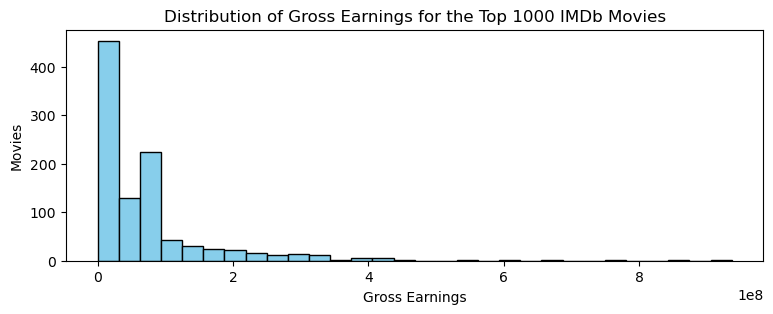

In [477]:
plt.figure(figsize=(9, 3)) 
plt.hist(gross_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of Gross Earnings for the Top 1000 IMDb Movies")
plt.xlabel("Gross Earnings")
plt.ylabel("Movies")

The distribution of movie gross earnings in this dataset is positively skewed, with a wide range of earnings, and a few highly successful movies contributing to the positive skew. The substantial variability also aligns with the numerical analysis and is clearly evident in the historgram plot.


### What are the most common movie genres in the dataset?

Remember that in data preprocessing, one-hot encoding was applied to the genre variable.

Thus, the primary focus to answer this question are the variables under:

- `Genre`: type, category, or theme of the movie

which are:

`War`, `Drama`, `Action`, `Adventure`, `Musical`, `Thriller`, `Music`, `History`, `Mystery`, `Crime`, `Comedy`, `Animation`, `Film-Noir`, `Sci-Fi`, `Biography`, `Sport`, `Western`, `Romance`, `Family`, `Fantasy`, `Horror`

To count the movies associated with each genre, we first put the individual genres into an array for easier selection in the DataFrame.


In [478]:
genre_columns = ['War', 'Drama', 'Action', 'Adventure', 'Musical', 'Thriller', 'Music', 'History', 'Mystery', 'Crime', 'Comedy', 'Animation', 'Film-Noir', 'Sci-Fi', 'Biography', 'Sport', 'Western', 'Romance', 'Family', 'Fantasy', 'Horror']

When the datatype is examined, one can see that the columns are in `int64`, rather than `boolean`.

So, to perform the method `sum` to get the total number of movies per genre, we first need to convert it to boolean using the method `astype(bool)`.


In [479]:
imdb_df[genre_columns] = imdb_df[genre_columns].astype(bool)

In [480]:
genre_counts = imdb_df[genre_columns].sum()
print(genre_counts)

War           51
Drama        724
Action       189
Adventure    196
Musical       17
Thriller     137
Music         35
History       56
Mystery       99
Crime        209
Comedy       233
Animation     82
Film-Noir     19
Sci-Fi        67
Biography    109
Sport         19
Western       20
Romance      125
Family        56
Fantasy       66
Horror        32
dtype: int64


After getting the genre_counts, we can get the 10 most common genres overall using the `sort_values` by descending order method and the `head(10)` method


In [481]:
genre_counts = genre_counts.sort_values(ascending=False).head(10)
genre_counts

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
dtype: int64

Based on the numerical summary, these three genres, Drama, Comedy, and Action, are the most common in the dataset and have the highest representation among the top 1000 movies on IMDb.


Utilizing a bar plot is an effective way to visually represent the genre frequency within the dataset.


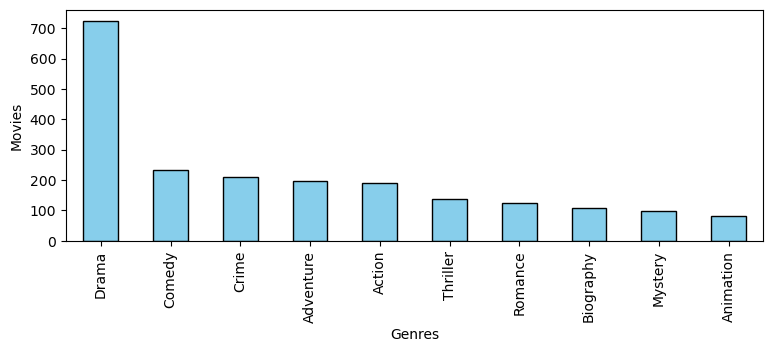

In [482]:
fig, ax = plt.subplots(figsize=(9, 3))
genre_counts[:10].plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.xlabel("Genres")
plt.ylabel("Movies")
plt.show()

The bar plot analysis underscores the prevalence of the top 10 genres: drama, comedy, crime, adventure, action, thriller, romance, biography, mystery, and animation. Notably, drama stands out as the most frequent genre, constituting a significant 72.4% of the movies in the dataset.


### How has the distribution of movie releases evolved over time?

The primary focus to answer this question is the variable:

- `Released_Year`: year in which the movie was publicly released

When looking at the years movies were released, one can examine the frequency of movie releases.

Select the `Released_Year` as a Series.


In [483]:
years_df = imdb_df['Released_Year']

In [484]:
year_counts = years_df.value_counts()
print(year_counts)

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1930     1
1921     1
1936     1
1922     1
1943     1
Name: count, Length: 99, dtype: int64


One can also determine the most frequent year the top 1000 movies on IMDb was released in.


In [485]:
imdb_df.agg({"Released_Year": ["mode"]})

,Released_Year
,mode
0,2014


In [486]:
imdb_df['Released_Year'].describe()

count    1000.000000
mean     1991.221000
std        23.285669
min      1920.000000
25%      1976.000000
50%      1999.000000
75%      2009.000000
max      2020.000000
Name: Released_Year, dtype: float64

The mode suggests a noteworthy surge in the number of movie releases during the year 2014. The average release year for these top movies is during 1991 with a moderate amount of spread based on its standard deviation, 23.29. You can also see that the data is skewed more towards recent years, as the median (1999) is closer to the 75th percentile (2009) than it is to the 25th percentile (1976).

The histogram below will help visualize the distribution of movie releases over time, with years on the x-axis and the number of movies on the y-axis.


Text(0, 0.5, 'Number of Movies Released')

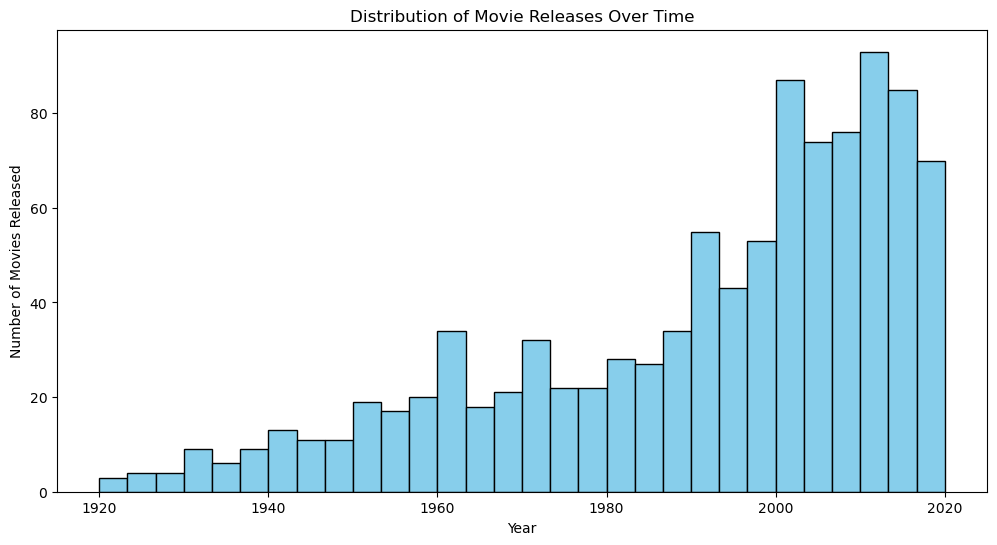

In [487]:
plt.figure(figsize=(12, 6))  
plt.hist(years_df, bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")

The distribution of movie release years in this dataset appears to be relatively narrow and negatively skewed, signifying a trend of increasing movie releases over time, especially during the 2000s.


### How does the movie's gross earnings relate to its IMDb rating?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `IMDB_Rating`: year in which the movie was publicly released

Below, you can see the summary statistics for both IMDB_Rating and Gross in the dataset.


In [488]:
ratings_df.describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

In [489]:
gross_df.describe()

count    1.000000e+03
mean     6.803475e+07
std      1.000371e+08
min      1.305000e+03
25%      5.012919e+06
50%      4.238945e+07
75%      6.803475e+07
max      9.366622e+08
Name: Gross, dtype: float64

In determining their relationship, their correlation to each other must be calculated. This can be done using the method `corr`.


In [490]:
ratings_df.corr(gross_df)

0.08988132138424759

A correlation coefficient of 0.0898813213842479, which is close to zero, indicates a very weak or negligible correlation. In statistical terms, this suggests that there is little to no linear relationship between a movie's gross earnings and its IMDb rating in the dataset.
 
Knowing this, the scatterplot can be used to further confirm and visualize the interpretation.


Text(0, 0.5, 'Gross Earnings')

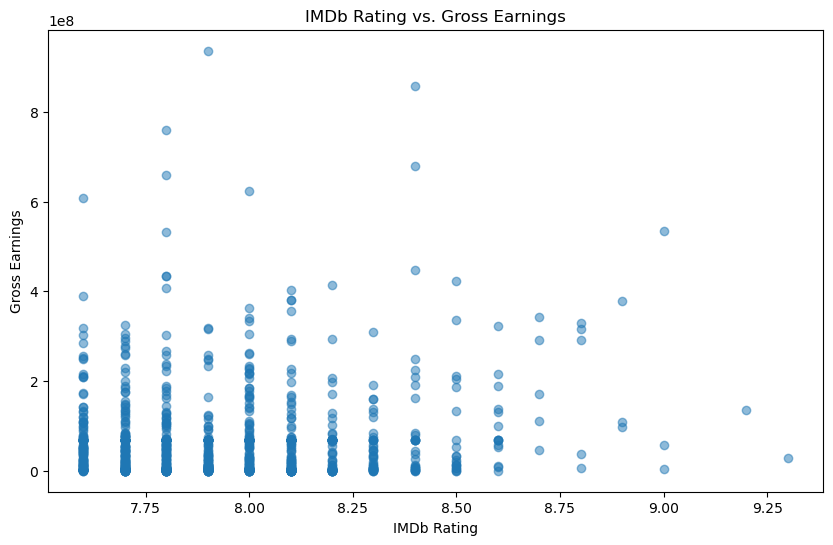

In [491]:
plt.figure(figsize=(10, 6))
plt.scatter(ratings_df, gross_df, alpha=0.5)
plt.title('IMDb Rating vs. Gross Earnings')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings')

When looking at the scatterplot, it is evident that there is a concentration of movies in the lower part, primarily consisting of films with lower IMDb ratings and lower gross earnings. This clustering suggests that a notable portion of movies in the dataset are not highly rated on IMDb and tend to have relatively low earnings.

However, it is important to emphasize that the overall scatter of data points on the graph remains quite wide, and there is no clear linear trend, which aligns with the correlation coefficient showing no correlation between the movie's IMDb rating and its earnings.

### Is there any relationship between the movie's release date and the movie's gross earnings?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `Released_Year`: year in which the movie was publicly released

Similar to the earlier question, one can also compute the correlation coefficient between the two variables to determine their relationship.


In [492]:
years_df.corr(gross_df)

0.19291187274644261

The correlation coefficient suggests that there is a weak positive relationship between the two variables, suggesting that, to some extent, more recent movies tend to have higher gross earnings.

The scatterplot below will help us visualize more about the relationship between them, as per our interpretation for the coefficient.


Text(0, 0.5, 'Gross Earnings')

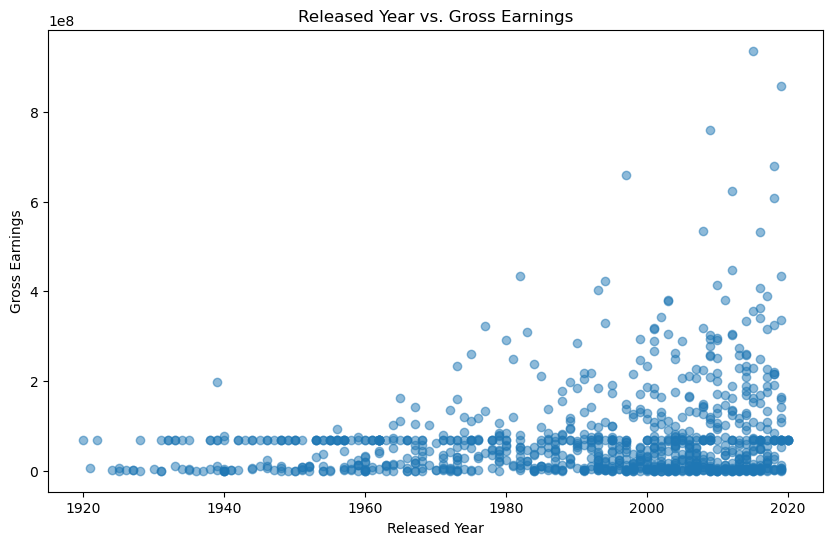

In [493]:
plt.figure(figsize=(10, 6))
plt.scatter(years_df, gross_df, alpha=0.5)
plt.title('Released Year vs. Gross Earnings')
plt.xlabel('Released Year')
plt.ylabel('Gross Earnings')

The scatterplot displays a right-skewed distribution, indicating that a considerable number of movies with lower gross earnings are spread across various release years. This suggests that movies with lower earnings can be found across different decades.

However, there is a noticeable concentration of data points in the lower part of the graph, especially during the 1920s to the 1960s. The scatterplot also reveals a shift in the distribution of data points. From the 1980s onward, there is a visible increase in movies with higher gross earnings, and this trend becomes more consistent from the 2000s to the 2020s. 

### Is there any relationship between the movie's gross earnings and the metascore from critics of movies?

The primary focus to answer this question are the variables:

- `Gross`: year in which the movie was publicly released
- `Meta_score`: year in which the movie was publicly released

Extract the metascore from the IMDb dataframe to make a series for the said variable.


In [494]:
metascore_df = imdb_df["Meta_score"]
print(metascore_df)

0       80
1      100
2       84
3       90
4       96
      ... 
995     76
996     84
997     85
998     78
999     93
Name: Meta_score, Length: 1000, dtype: int32


The correlation coefficient between the `Gross` and `Meta_score` is calculated to assess the nature and strength of their relationship below.


In [495]:
metascore_df.corr(gross_df)

-0.03103479539641046

The correlation coefficient suggests that there is a very weak, almost negligible negative relationship, indicating that there is no meaningful linear relationship between a movie's Metascore rating and its gross earnings in the dataset.


The scatterplot below will aid in visualizing this relationship.


Text(0, 0.5, 'Gross Earnings')

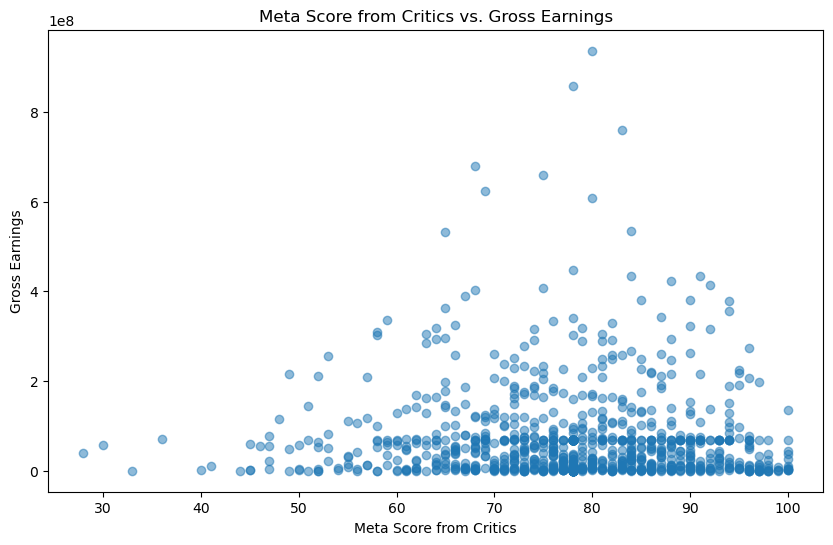

In [496]:
plt.figure(figsize=(10, 6))
plt.scatter(metascore_df, gross_df, alpha=0.5)
plt.title('Meta Score from Critics vs. Gross Earnings')
plt.xlabel('Meta Score from Critics')
plt.ylabel('Gross Earnings')

The scatterplot indicates a noticeable concentration of data points within a specific range of 60 to 90 Metascores for movies with lower gross earnings. However, the extremely weak negative correlation emphasizes that there is no reliable predictive relationship between a movie's Metascore from critics and its earnings. 

### Which genres are most commonly featured in the top 10 grossing movies?

In [497]:
top_gross_movies = imdb_df.nlargest(10, 'Gross')[['Series_Title', 'Gross']]
top_gross_movies_genres = imdb_df.loc[top_gross_movies.index, genre_columns]
top_gross_genre_counts = top_gross_movies_genres.sum()
top_gross_genre_counts


War          0
Drama        3
Action       9
Adventure    8
Musical      0
Thriller     0
Music        0
History      0
Mystery      0
Crime        1
Comedy       0
Animation    1
Film-Noir    0
Sci-Fi       4
Biography    0
Sport        0
Western      0
Romance      1
Family       0
Fantasy      1
Horror       0
dtype: int64

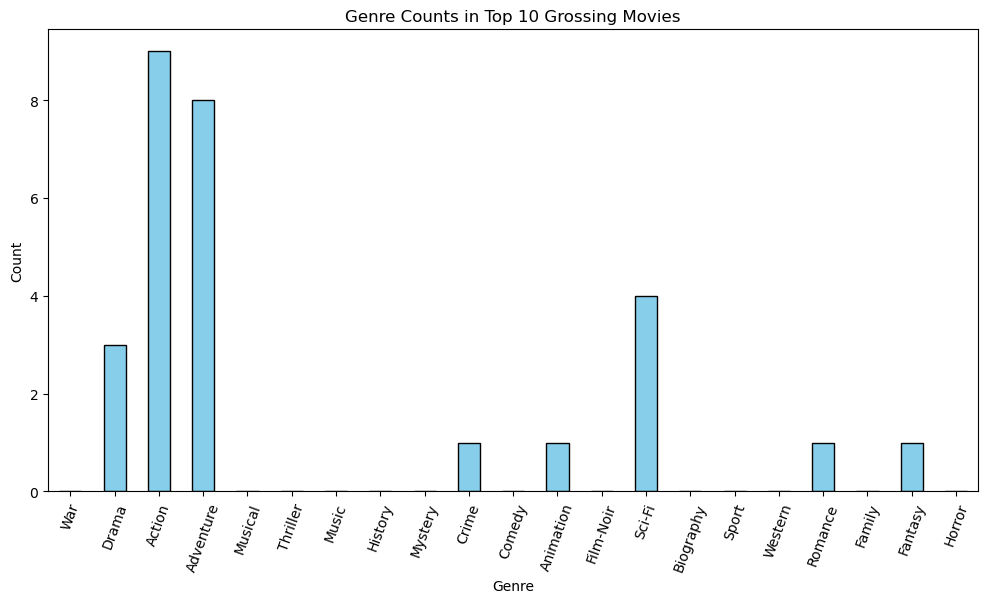

In [498]:
fig, ax = plt.subplots(figsize=(12,6))
top_gross_genre_counts.plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.title('Genre Counts in Top 10 Grossing Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

Observing the bar graph, it becomes apparent that the action and adventure genres are prominent among the top-grossing movies.

### Which genres are most commonly featured in the top 10 IMDB rated movies?

In [499]:
top_rated_movies = imdb_df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Gross']]

In [500]:
top_rated_movies = imdb_df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Gross']]
top_rated_movies_genres = imdb_df.loc[top_rated_movies.index, genre_columns]
top_rated_genre_counts = top_rated_movies_genres.sum()
top_rated_genre_counts


War          0
Drama        9
Action       3
Adventure    2
Musical      0
Thriller     0
Music        0
History      1
Mystery      0
Crime        5
Comedy       0
Animation    0
Film-Noir    0
Sci-Fi       1
Biography    1
Sport        0
Western      0
Romance      0
Family       0
Fantasy      0
Horror       0
dtype: int64

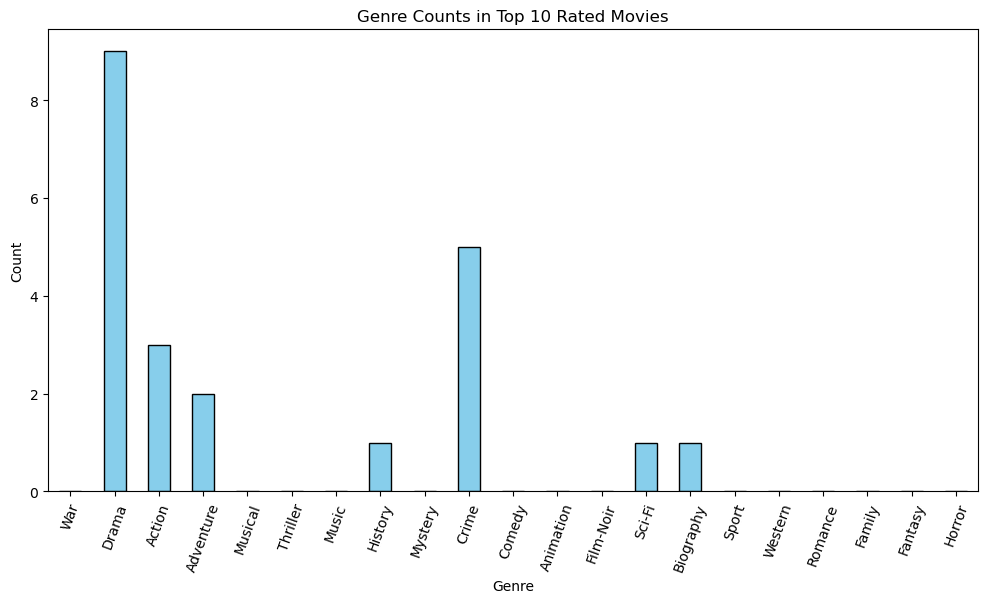

In [501]:
fig, ax = plt.subplots(figsize=(12,6))
top_rated_genre_counts.plot(kind='bar', x='Genre', y='Count', ax=ax, edgecolor='k', color='skyblue')
plt.title('Genre Counts in Top 10 Rated Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

From the bar graph, it becomes apparent that the drama genre is prevalent among top-rated movies.

### What is the average gross earning per genre?

In [502]:
genre_gross_means = {}

for x in genre_columns:
    genre_gross_means[x] = imdb_df.groupby(x)['Gross'].mean()[1]

genre_gross_means

{'War': 46301635.21568628,
 'Drama': 49914414.37292818,
 'Action': 128457539.22751322,
 'Adventure': 152771535.17857143,
 'Musical': 28640871.529411763,
 'Thriller': 60520928.525547445,
 'Music': 34926264.942857146,
 'History': 58440207.89285714,
 'Mystery': 45328983.484848484,
 'Crime': 45653705.57416268,
 'Comedy': 64830004.8111588,
 'Animation': 117004215.51219513,
 'Film-Noir': 31466884.789473683,
 'Sci-Fi': 140862966.0597015,
 'Biography': 56780087.69724771,
 'Sport': 53672020.10526316,
 'Western': 56422020.4,
 'Romance': 44344177.296,
 'Family': 89375813.21428572,
 'Fantasy': 102468040.25757575,
 'Horror': 48762481.65625}

The average gross earnings per genre vary significantly. Genres like Animation, Adventure, and Science Fiction have some of the highest average earnings, while genres like Musical, Music, and Film-Noir have lower average earnings.

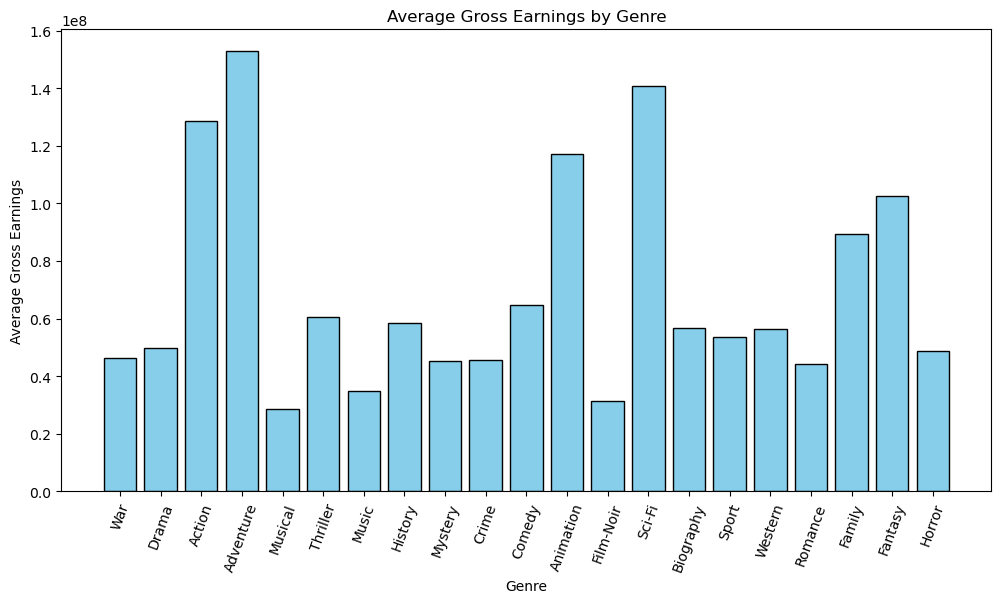

In [503]:
plt.figure(figsize=(12,6)) 
plt.bar(genre_gross_means.keys(), genre_gross_means.values(), edgecolor='k', color='skyblue')
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings')
plt.xticks(rotation=70)
plt.show()

Based on the bar graph, it becomes clear that the genres of action, adventure, animation, sci-fi, family, and fantasy yield notably high average gross earnings.

## Research Question

Following our exploratory data analysis, we sought to address the question:

###  "Are there particular combinations of genres that tend to perform exceptionally well financially, and can we identify patterns in these combinations?"

This question emerged as we identified significant variability in the gross earnings of movies in the dataset, with certain genres achieving notably high average gross earnings, many of which are prominently featured among the top-grossing films. 

Furthermore, our analysis delved into the financial performance of individual movie genres, prompting the need to explore how these genres interact and form combinations in relation to financial success. Additionally, our examination of the gross earnings for movies, the most common movie genres in the dataset, and the genres featured in the top 10 grossing and IMDb-rated movies directly emphasizes the exploration of the connection between genre combinations and financial performance. This approach broadens our understanding of how genre combinations influence the success of movies in the industry.

By pursuing this research question, our objective is to offer valuable insights that can serve as a compass for filmmakers, studios, and producers in their decision-making process when choosing genre combinations for their projects. This, in turn, can help mitigate the uncertainties associated with production costs. Beyond optimizing genre selection, these insights can also illuminate the constantly shifting preferences of audiences and the intricate dynamics of the film industry. Our aim is to empower filmmakers with data-driven knowledge that can enhance their strategic decision-making and contribute to the vitality and adaptability of the film industry.

## Data Modelling

### Association Rule Mining

We start first with association rule mining to discover frequent patterns and associations between genre combinations and financial outcomes. This will help us identify which genres tend to co-occur in successful movies.

To do this, we need to format the dataset as to which it would be accepted by the `apriori` module given by the `mlxtend` library.

In [504]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   int32  
 7   Director       1000 non-null   object 
 8   Stars          1000 non-null   object 
 9   No_of_Votes    1000 non-null   int64  
 10  Gross          1000 non-null   int32  
 11  Sport          1000 non-null   bool   
 12  Action         1000 non-null   bool   
 13  Romance        1000 non-null   bool   
 14  Sci-Fi         1000 non-null   bool   
 15  History        1000 non-null   bool   
 16  Film-Noir      1000 non-null   bool   
 17  Horror         1000 non-null   bool   
 18  Western  

As examined with the current state of the dataset, the genres are already formatted in one-hot encoding, however, we need to apply binning to the gross to be categorized as low, medium, and high before proceeding with applying association rule mining.

To do this, we can use the function `qcut` which is a quantile-based discretization function. After doing so, we should also apply one-hot encoding for more flexibility that is to be used in the association rule mining in the latter part.

In [505]:
imdb_df['gross_cat'] = pd.qcut(imdb_df['Gross'], q=3, labels=['low', 'medium', 'high'])

one_hot_encoded = pd.get_dummies(imdb_df['gross_cat'], prefix='gross')

imdb_df = pd.concat([imdb_df, one_hot_encoded], axis=1)

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Series_Title   1000 non-null   object  
 1   Released_Year  1000 non-null   int32   
 2   Certificate    1000 non-null   object  
 3   Runtime        1000 non-null   int32   
 4   Genre          1000 non-null   object  
 5   IMDB_Rating    1000 non-null   float64 
 6   Meta_score     1000 non-null   int32   
 7   Director       1000 non-null   object  
 8   Stars          1000 non-null   object  
 9   No_of_Votes    1000 non-null   int64   
 10  Gross          1000 non-null   int32   
 11  Sport          1000 non-null   bool    
 12  Action         1000 non-null   bool    
 13  Romance        1000 non-null   bool    
 14  Sci-Fi         1000 non-null   bool    
 15  History        1000 non-null   bool    
 16  Film-Noir      1000 non-null   bool    
 17  Horror         1000 non-null   boo

To know the frequent combinations that occur in this movie dataset, we need to drop unnecessary columns and only get the one-hot encoded genre columns.

In [506]:
columns_to_drop = ['Series_Title','gross_cat', 'gross_low', 'gross_medium', 'gross_high','Released_Year', 'Gross', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Stars', 'No_of_Votes'] 

genres_df = imdb_df.drop(columns=columns_to_drop, axis=1)

genres_df.head(10)

,Sport,Action,Romance,Sci-Fi,History,Film-Noir,Horror,Western,Crime,Biography,...,Animation,War,Music,Thriller,Fantasy,Mystery,Drama,Comedy,Musical,Family
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
8,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Now that we have this `DataFrame` , we can now use `apriori` to find the frequent combinations of genres. We set the `min_support` to 0.02.

In [507]:
frequent_is = apriori(genres_df, min_support=0.02, use_colnames=True)
frequent_is

,support,itemsets
0,0.189,(Action)
1,0.125,(Romance)
2,0.067,(Sci-Fi)
3,0.056,(History)
4,0.032,(Horror)
5,0.020,(Western)
6,0.209,(Crime)
7,0.109,(Biography)
8,0.196,(Adventure)
9,0.082,(Animation)


After getting the support, we can now get the association rule for this, wherein we set the `min_threshold` to 0.6

In [508]:
rules_1 = association_rules(frequent_is, metric="confidence", min_threshold=0.6)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Romance),(Drama),0.125,0.724,0.106,0.848000,1.171271,0.015500,1.815789,0.167116
1,(History),(Drama),0.056,0.724,0.054,0.964286,1.331886,0.013456,7.728000,0.263967
2,(Crime),(Drama),0.209,0.724,0.160,0.765550,1.057390,0.008684,1.177224,0.068616
3,(Biography),(Drama),0.109,0.724,0.103,0.944954,1.305185,0.024084,5.014000,0.262430
4,(Animation),(Adventure),0.082,0.196,0.052,0.634146,3.235441,0.035928,2.197600,0.752640
5,(War),(Drama),0.051,0.724,0.044,0.862745,1.191637,0.007076,2.010857,0.169461
6,(Music),(Drama),0.035,0.724,0.031,0.885714,1.223362,0.005660,2.415000,0.189203
7,(Thriller),(Drama),0.137,0.724,0.083,0.605839,0.836795,-0.016188,0.700222,-0.184338
8,(Mystery),(Drama),0.099,0.724,0.065,0.656566,0.906859,-0.006676,0.803647,-0.102328
9,"(Adventure, Sci-Fi)",(Action),0.030,0.189,0.021,0.700000,3.703704,0.015330,2.703333,0.752577


The rules indicate certain genre combinations tend to co-occur frequently. For instance, genres like "History" and "Biography" almost always lead to "Drama," showing a consistent pattern. Conversely, genres like "Action" and "Sci-Fi" leading to "Adventure" have a lower confidence, suggesting they don't always co-occur.

We can also see that Drama is significantly frequent as a consequent for the genres, "History", "Romance", "War", "Music", and so on. This might imply that movies in these genres frequently exhibit dramatic elements or storytelling styles commonly found in Drama films. 

Aside from that, "Comedy, Animation" often leads to "Adventure," showing a pattern where movies that are both comedy and animation tend to be associated with adventure themes. Additionally, the presence of "Action, Sci-Fi" as antecedents often leads to "Adventure," indicating a link between action-packed, science fiction movies and adventure-themed films. 

With the identified frequent genre combinations, we aim to create a dedicated DataFrame for further in-depth analysis alongside the IMDb movie dataset. Our next objective is to explore the average earnings concerning these commonly occurring genre mixes, potentially revealing associations or patterns between both variables.

To get started, we convert the column values from earlier to a `DataFrame`.

In [509]:
# Combine 'antecedents' and 'consequents' to create a frequent combination of genres DataFrame
freq_genres_df = pd.DataFrame({
    'Genre': rules_1.apply(lambda row: row['antecedents'].union(row['consequents']), axis=1)
})

# Remove duplicates 
freq_genres_df = freq_genres_df.drop_duplicates(keep='first')

freq_genres_df

,Genre
0,"(Romance, Drama)"
1,"(History, Drama)"
2,"(Drama, Crime)"
3,"(Biography, Drama)"
4,"(Adventure, Animation)"
5,"(War, Drama)"
6,"(Music, Drama)"
7,"(Drama, Thriller)"
8,"(Mystery, Drama)"
9,"(Adventure, Action, Sci-Fi)"


Now that we have our `DataFrame` for the frequent combinations of genres, we will merge it with matching movies containing the same genres. After doing so, create a bar plot for easier visualization of the data.

In [510]:
# Sort and format to merge the frequent combination genres with matching movies in the IMDb DataFrame
columns_to_drop = ['Released_Year', 'Certificate', 'gross_low', 'gross_medium', 'gross_high', 'Runtime', 'IMDB_Rating', 'Meta_score', 'Director', 'Stars', 'No_of_Votes']  

freq_genres_df['Genre'] = freq_genres_df['Genre'].apply(tuple)

movies_gen_df = imdb_df.drop(columns=columns_to_drop, axis=1)

movies_gen_df['Genre']=movies_gen_df['Genre'].apply(tuple)

columns_to_drop = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
movies_gen_df.drop(movies_gen_df.columns[columns_to_drop], axis=1, inplace=True) 

freq_genres_df['Genre'] = freq_genres_df['Genre'].apply(lambda x: ', '.join(sorted(x)))
movies_gen_df['Genre'] = movies_gen_df['Genre'].apply(lambda x: ', '.join(sorted(x)))

# Merge the two DataFrames with matching genres
merged_df = movies_gen_df.merge(freq_genres_df, how='inner', left_on='Genre', right_on='Genre')

Text(0, 0.5, 'Average Gross')

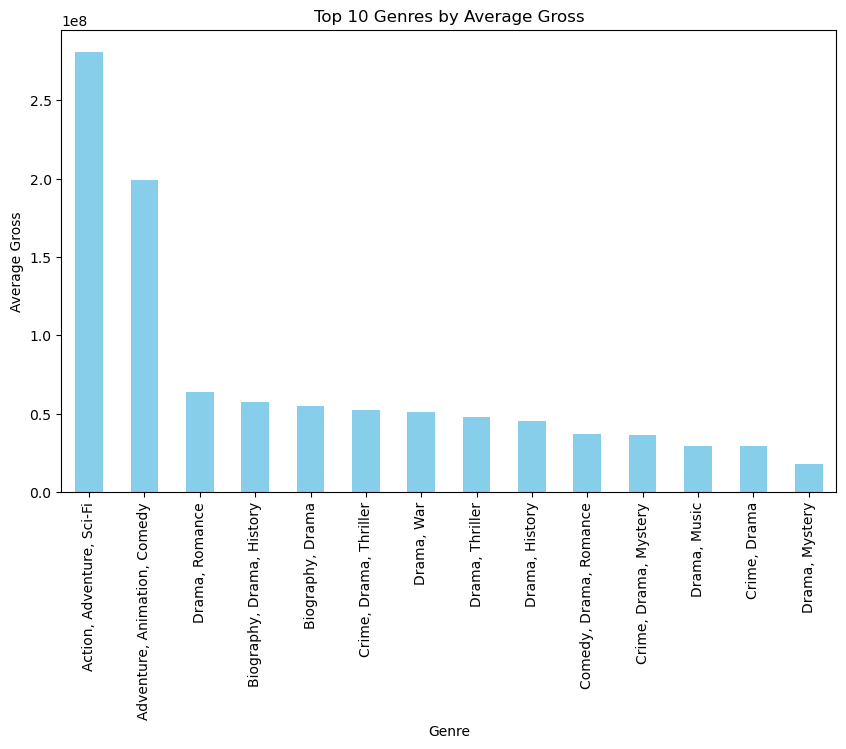

In [511]:
# Create a bar plot to visualize the frequent combinations and their respective average gross
genre_gross = merged_df.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_gross.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Average Gross')
plt.xlabel('Genre')
plt.ylabel('Average Gross')

The bar chart vividly highlights the dominance of the 'Action, Adventure, Sci-Fi' genre combination, standing out prominently in both prevalence and gross earnings. Notably, there's a conspicuous decline in earnings post this combination. Following closely is 'Adventure, Animation, Comedy', noted for its association with the adventure genre. This combination boasts an average gross of approximately 2.0 multiplied by 1e8, while the leading 'Action, Adventure, Sci-Fi' combination surpasses this by over 25%, signifying its significantly higher earnings. 

Subsequently, we observe a notable decrease in average earnings as we move to the third-ranking combination, 'Drama, Romance', with an estimated average gross of more than 0.5 multiplied by 1e8, representing a roughly 75% drop from the preceding combination. The rest of the combinations closely align with this figure. Interestingly, 'Drama, Mystery' marks the lowest average earnings among the listed combinations.

Intriguingly, knowing this, we can delve deeper into the presence or absence of frequent genre combinations within the top-grossing movies dataset.

To do this, the columns in interest are:
- `Genre` - type, category, or theme of the movie
- `Gross` - amount of money earned or grossed by the movie

First, arrange the values from highest to lowest to get the top grossing movies in the IMDb dataset. Then, select the `Genre` column and create a `DataFrame` for the said values.

In [512]:
top_gross_genres_df = imdb_df.sort_values('Gross', ascending=False)
top_gross_genres_df = top_gross_genres_df['Genre'].head(10)
top_gross_genres_df

477       [Action, Adventure, Sci-Fi]
59         [Action, Adventure, Drama]
623      [Action, Adventure, Fantasy]
60        [Action, Adventure, Sci-Fi]
652                  [Drama, Romance]
357       [Action, Adventure, Sci-Fi]
891    [Animation, Action, Adventure]
2              [Action, Crime, Drama]
582       [Action, Adventure, Sci-Fi]
63                [Action, Adventure]
Name: Genre, dtype: object

When selecting the "Genre" column for the frequent combinations of genres `DataFrame`, from a glance, one can see that there are certainly similarities between the two categories.

In [513]:
freq_genres_df['Genre']

0                   Drama, Romance
1                   Drama, History
2                     Crime, Drama
3                 Biography, Drama
4             Adventure, Animation
5                       Drama, War
6                     Drama, Music
7                  Drama, Thriller
8                   Drama, Mystery
9        Action, Adventure, Sci-Fi
11          Comedy, Drama, Romance
12       Biography, Drama, History
13          Crime, Drama, Thriller
14           Crime, Drama, Mystery
15    Adventure, Animation, Comedy
Name: Genre, dtype: object

To gather more insight, we will convert the two separate genre `DataFrames` into sets to distinguish the intersection, meaning, if there are genres in the frequent combination genres present in the top grossing films' genres. 

In [514]:
# Convert the lists to sets of strings
top_gross_genres_set = {', '.join(sorted(genre)) for genre in top_gross_genres_df}
frequent_combinations_set = set(freq_genres_df['Genre'])

# Find the intersection
overlap_genres = top_gross_genres_set.intersection(frequent_combinations_set)

# Display the intersection
print(overlap_genres)

{'Action, Adventure, Sci-Fi', 'Drama, Romance'}


With our two `DataFrames` being sets, we can create a Venn diagram to visualize the data, as shown below.

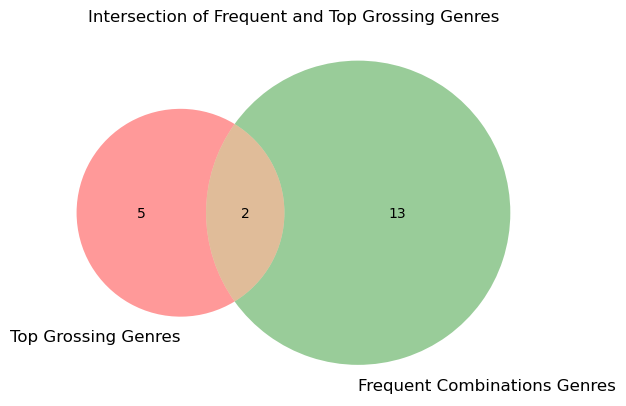

In [515]:
# Create the Venn diagram
venn2(subsets=(len(top_gross_genres_set - overlap_genres),
               len(frequent_combinations_set - overlap_genres),
               len(overlap_genres)),
      set_labels=('Top Grossing Genres', 'Frequent Combinations Genres'))

# Display the plot
plt.title("Intersection of Frequent and Top Grossing Genres")
plt.show()

Additionally, we can create a bar plot to check for the occurrences, if there are, of the top grossing films' combination of genres with the frequent genre combinations we found.

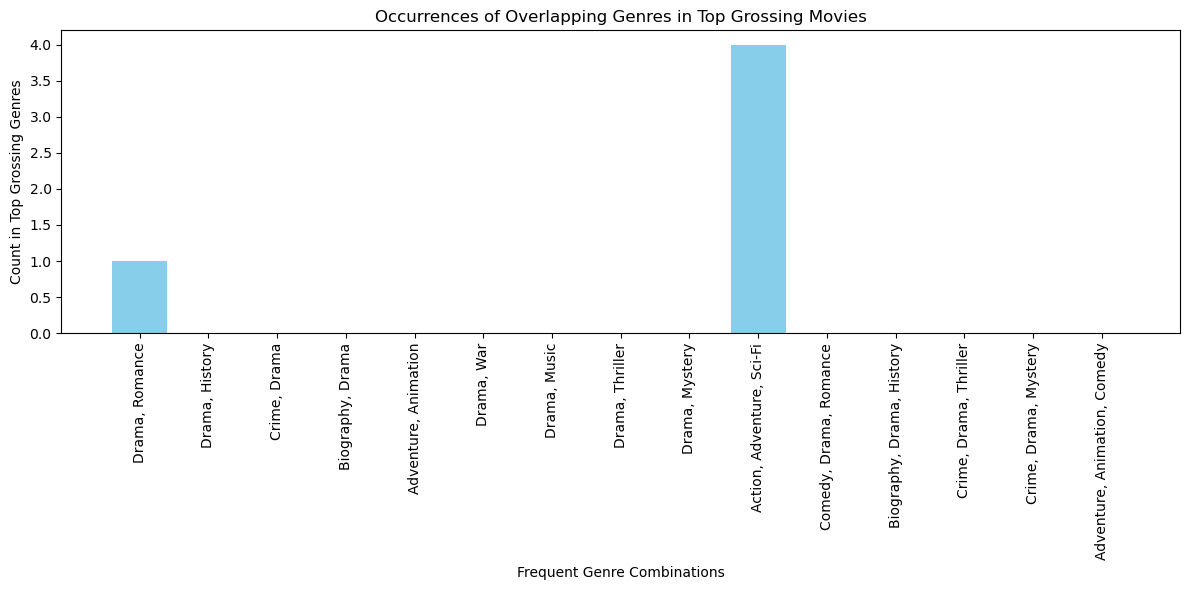

In [516]:
genre_counts = {combo: 0 for combo in freq_genres_df['Genre']}

# Count occurrences of overlapping genres in top_gross_genres_df
for combined_genre in freq_genres_df['Genre']:
    if combined_genre in overlap_genres:
        count = top_gross_genres_df[top_gross_genres_df.apply(lambda x: ', '.join(sorted(x))) == combined_genre].shape[0]
        genre_counts[combined_genre] = count

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xlabel('Frequent Genre Combinations')
plt.ylabel('Count in Top Grossing Genres')
plt.title('Occurrences of Overlapping Genres in Top Grossing Movies')
plt.xticks(rotation=90)  # Rotate labels to fit
plt.tight_layout()
plt.show()

One can see after getting the intersection and creating a Venn diagram, there are only two combinations of genres overlapping with the top grossing genres and the most frequent genre combinations, namely, "Drama, Romance" and "Action, Adventure, Sci-Fi". 

From the bar graph, "Drama, Romance" appears only once among the top-grossing films' genre combinations, suggesting a less prevalent trend for this combination in highly profitable movies. Conversely, "Action, Adventure, Sci-Fi" emerges as more prominent, featuring four times in the top-grossing films, hinting at a stronger association with financial success. This disparity signifies a clear distinction between commonly occurring genres and those driving substantial box office earnings.

Lastly, we would like to examine frequent genre and gross combinations by films. As with the earlier analysis, we will drop the unnecessary columns and leave the one-hot encoded columns for genre and gross.


In [517]:
columns_to_drop = ['Series_Title','gross_cat','Released_Year', 'Gross', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Meta_score', 'Director', 'Stars', 'No_of_Votes']  # Replace with the actual column names you want to drop

genres_gross_df = imdb_df.drop(columns=columns_to_drop, axis=1)

Using the apriori function, we get the frequent combinations for both genres and gross with a `min_support` set to 0.02.

In [518]:
frequent_gg = apriori(genres_gross_df, min_support=0.02, use_colnames=True)
frequent_gg

,support,itemsets
0,0.189,(Action)
1,0.125,(Romance)
2,0.067,(Sci-Fi)
3,0.056,(History)
4,0.032,(Horror)
...,...,...
119,0.038,"(Thriller, Drama, gross_medium)"
120,0.030,"(Mystery, gross_low, Drama)"
121,0.026,"(Mystery, gross_medium, Drama)"
122,0.056,"(Comedy, gross_low, Drama)"


One can note with these frequent itemsets the difference in frequences between the gross categories, "low", "medium", and "high". The data shows that movies falling into the "medium" gross category are more frequent compared to the "low" and "high" categories. It's worth noting that a larger number of movies in this dataset belong to the "medium" gross category, potentially indicating a concentration of movies with moderate earnings.

In [519]:
rules = association_rules(frequent_gg, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Romance),(Drama),0.125,0.724,0.106,0.848000,1.171271,0.015500,1.815789,0.167116
1,(History),(Drama),0.056,0.724,0.054,0.964286,1.331886,0.013456,7.728000,0.263967
2,(Crime),(Drama),0.209,0.724,0.160,0.765550,1.057390,0.008684,1.177224,0.068616
3,(Biography),(Drama),0.109,0.724,0.103,0.944954,1.305185,0.024084,5.014000,0.262430
4,(Animation),(Adventure),0.082,0.196,0.052,0.634146,3.235441,0.035928,2.197600,0.752640
5,(War),(Drama),0.051,0.724,0.044,0.862745,1.191637,0.007076,2.010857,0.169461
6,(Music),(Drama),0.035,0.724,0.031,0.885714,1.223362,0.005660,2.415000,0.189203
7,(Thriller),(Drama),0.137,0.724,0.083,0.605839,0.836795,-0.016188,0.700222,-0.184338
8,(Mystery),(Drama),0.099,0.724,0.065,0.656566,0.906859,-0.006676,0.803647,-0.102328
9,(gross_low),(Drama),0.334,0.724,0.272,0.814371,1.124822,0.030184,1.486839,0.166623


One of the most notable insights that can be seen from the results is that the data suggests that the combination of Action and Adventure genres tends to result in higher grossing movies. When these two genres are combined, there's a high likelihood of yielding a high gross. This association implies that movies that blend Action and Adventure tend to perform well financially, possibly due to their broader appeal that attracts larger audiences. 

The association rules consistently link the Drama genre not only to different gross categories like "low" and "medium" but also to various other genres. Despite its less frequent association with the "high" category, these patterns underline the remarkable versatility of the Drama genre. Its prevalence across various associations suggests that Drama movies tend to have a multifaceted nature, often intersecting with different genres and financial brackets.

### Clustering

After identifying patterns with association rule mining, apply clustering to group movies with similar genre combinations and financial performance. This can provide additional insights into different clusters of movies based on these attributes.

For this clustering, we will utilize KMeans clustering. First, we get the one-hot encoded genres joined by the gross dataframe.

In [520]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

genres_gross_df = genres_df.join(gross_df)

We then use the elbow method to figure out which k is optimal for our clustering.

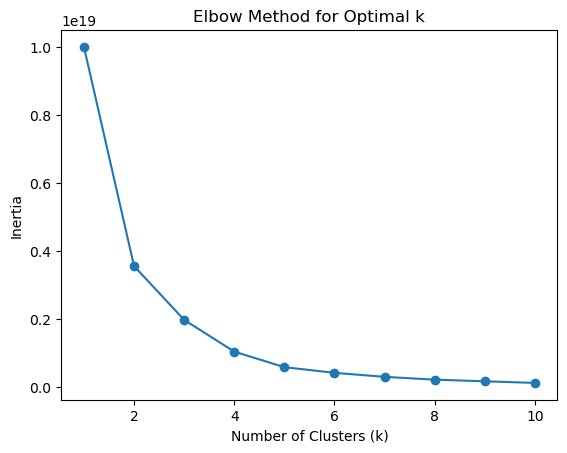

In [521]:
inertia_values = []

# Range of k values to test
k_values = range(1, 11)

# Run KMeans for each k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genres_gross_df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

After getting our k, we proceed to normalize our values and then perform Kmeans clustering to our dataframe.

In [522]:
scaler = StandardScaler()
df_genre_normalized = pd.DataFrame(scaler.fit_transform(genres_gross_df), columns=genres_gross_df.columns)
kmeans = KMeans(n_clusters=3, random_state=42)
genres_gross_df['cluster'] = kmeans.fit_predict(df_genre_normalized)

We can check the frequency of each genre per cluster to draw insights about genre combinations in relation to gross earnings.

In [523]:
cluster0 = genres_gross_df[genres_gross_df['cluster'] == 0]
cluster1 = genres_gross_df[genres_gross_df['cluster'] == 1]
cluster2 = genres_gross_df[genres_gross_df['cluster'] == 2]

# Iterate through genre columns
print('Cluster 0')
for genre in genre_columns:
    count_true = cluster0[genre].sum()
    print(f"Class {genre}: {count_true}")

print('\nCluster 1')
for genre in genre_columns:
    count_true = cluster1[genre].sum()
    print(f"Class {genre}: {count_true}")

print('\nCluster 2')
for genre in genre_columns:
    count_true = cluster2[genre].sum()
    print(f"Class {genre}: {count_true}")

Cluster 0
Class War: 2
Class Drama: 41
Class Action: 99
Class Adventure: 157
Class Musical: 1
Class Thriller: 8
Class Music: 0
Class History: 1
Class Mystery: 1
Class Crime: 8
Class Comedy: 53
Class Animation: 74
Class Film-Noir: 1
Class Sci-Fi: 39
Class Biography: 1
Class Sport: 0
Class Western: 2
Class Romance: 1
Class Family: 33
Class Fantasy: 40
Class Horror: 2

Cluster 1
Class War: 49
Class Drama: 146
Class Action: 5
Class Adventure: 6
Class Musical: 2
Class Thriller: 6
Class Music: 8
Class History: 9
Class Mystery: 10
Class Crime: 6
Class Comedy: 57
Class Animation: 2
Class Film-Noir: 2
Class Sci-Fi: 2
Class Biography: 2
Class Sport: 0
Class Western: 1
Class Romance: 124
Class Family: 1
Class Fantasy: 8
Class Horror: 0

Cluster 2
Class War: 0
Class Drama: 537
Class Action: 85
Class Adventure: 33
Class Musical: 14
Class Thriller: 123
Class Music: 27
Class History: 46
Class Mystery: 88
Class Crime: 195
Class Comedy: 123
Class Animation: 6
Class Film-Noir: 16
Class Sci-Fi: 26
Class 

The clustering results reveal distinct patterns in genre combinations—such that the dominant genres in each cluster suggest certain combinations that are prevalent within that cluster. In Cluster 0, crime, drama, action, and thriller genres dominate, suggesting a preference for intense and action-packed narratives. Cluster 1 is characterized by a prevalence of drama, comedy, romance, and action, indicating a diverse but humor and emotion-focused cluster. Cluster 2 stands out for its emphasis on adventure, action, animation, and comedy, pointing to a cluster with a penchant for excitement and animated storytelling. We can also observe that Drama, Action, and Comedy are recurring genres among the clusters, suggesting that they consistently contribute to high or low gross, irrespective of other genres in the cluster.

These findings offer valuable insights into potential audience preferences and the types of movies associated with each cluster. To see if movies in a particular cluster tend to perform better financially compared to the overall average, we must compare the average gross earnings of movies of each cluster against the overall average gross earnings.

Get the overall average gross earnings

In [540]:
print('Overall Average Gross:', gross_df.mean())

Overall Average Gross: 68034750.895


Get the gross earnings for each cluster

In [532]:
overall_average_gross0 = cluster0['Gross'].mean()
overall_average_gross1 = cluster1['Gross'].mean()
overall_average_gross2 = cluster2['Gross'].mean()

print('Cluster 0 Average Gross:', overall_average_gross0)
print('Cluster 1 Average Gross:', overall_average_gross1)
print('Cluster 2 Average Gross:', overall_average_gross2)

Cluster 0 Average Gross: 163723376.3556701
Cluster 1 Average Gross: 45089900.86982249
Cluster 2 Average Gross: 44979941.3422292


It can be seen that the cluster 0 has the highest average gross among the three clusters, surpassing even the overall average gross. This suggests that the dominant genres in this cluster tend to have higher gross earnings compared to clusters 1 and 2. However, it's noteworthy that the dominant genres within each cluster, when combined, demonstrate commendable financial performance. This underscores the notion that the unique combinations of dominant genres in each cluster contributes significantly to their collective financial success.

## Statistical Inference


### Testing of Hypothesis : ANOVA

Conduct hypothesis tests, specifically t-tests or ANOVA (Analysis of Variance), to determine if there are statistically significant differences in financial performance among different genre combinations or groups. For example, you can compare the means of financial metrics for different genres using t-tests.

### Test of Independence : Chi-Square Test
We use the chi-square test for independence to see if the different genres are independent of the movie's gross earnings. We will use a p = 0.05 significance level. Here are the following hypotheses.

Null hypothesis: Movie genres are independent of a movie's gross earnings.

Alternative hypothesis: Movie genres are dependent of a movie's gross earnings.

We then display these information in a table.

In [529]:
gen_counts = imdb_df.groupby(by=['gross_cat'])[genre_columns].sum()
gen_counts

,War,Drama,Action,Adventure,Musical,Thriller,Music,History,Mystery,Crime,...,Animation,Film-Noir,Sci-Fi,Biography,Sport,Western,Romance,Family,Fantasy,Horror
gross_cat,,,,,,,,,,,,,,,,,,,,,
low,20,272,31,30,9,40,19,10,39,76,...,26,11,11,18,7,6,58,16,20,10
medium,24,323,81,69,6,64,11,33,43,102,...,22,8,25,64,5,9,48,18,22,18
high,7,129,77,97,2,33,5,13,17,31,...,34,0,31,27,7,5,19,22,24,4


Let's apply the chi-square test. We can observe that a p-value of = 4.93 x 10^(-32) was calculated.

In [530]:
chi2_contingency(gen_counts)

Chi2ContingencyResult(statistic=249.17032838166384, pvalue=4.934647284968974e-32, dof=40, expected_freq=array([[ 16.23730815, 230.50609996,  60.17355372,  62.40220386,
          5.41243605,  43.61786698,  11.14325069,  17.8292011 ,
         31.51948052,  66.54112554,  74.18221173,  26.10704447,
          6.04919323,  21.3313656 ,  34.70326643,   6.04919323,
          6.36757182,  39.79732389,  17.8292011 ,  21.01298701,
         10.18811492],
       [ 22.05785124, 313.13498623,  81.74380165,  84.77134986,
          7.35261708,  59.25344353,  15.13774105,  24.22038567,
         42.81818182,  90.39393939, 100.77410468,  35.46556474,
          8.21763085,  28.97796143,  47.14325069,   8.21763085,
          8.65013774,  54.06336088,  24.22038567,  28.54545455,
         13.84022039],
       [ 12.70484061, 180.35891381,  47.08264463,  48.82644628,
          4.23494687,  34.12868949,   8.71900826,  13.95041322,
         24.66233766,  52.06493506,  58.04368359,  20.42739079,
          4.733175

Because the p-value of 4.93e-32 is not statistically significant, we reject the null hypothesis. Therefore, movie genres are dependent of a movie's gross earnings.

## Insights and Conclusions

Clearly state your insights and conclusions from the data to answer the research question. Make sure that the conclusion is backed up with statistical evidence using hypothesis testing.
